<a href="https://colab.research.google.com/github/nsydn/ise304_syssim/blob/main/input/input_analysis_2223s_fuelstation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Input modelling example**

In [84]:
import matplotlib.pyplot as plt
from scipy.stats import expon, norm
import numpy as np
import pandas as pd
from scipy import stats

In [85]:
data = pd.read_excel('ise304_syssim_2223s_6_input_data_example.xlsx')
data.head()

,Customer,Arrival time,Interarrival time,Interarrival (sec),Interarrival (min),RAND(),Cust type,Fuel pumps busy,Queue length,Delay (fuel),...,"Delay (wash,min)",Wash service start,Wash time,Wash time (sec),Wash time (min),Unnamed: 33,Unnamed: 34,Unnamed: 35,Cust type.1,Definition
0,1,12:00:00,00:00:03,3,0.050000,0.970969,3,NaN,NaN,NaN,...,3.416667,12:04:13,12:09:22,562.0,9.366667,NaN,NaN,NaN,1,Fuel
1,2,12:00:03,00:03:52,232,3.866667,0.995424,3,NaN,NaN,NaN,...,1.933333,12:05:52,12:13:02,779.0,12.983333,NaN,NaN,NaN,2,Market
2,3,12:03:55,00:04:53,293,4.883333,0.475857,1,1.0,1.0,00:01:07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,Wash
3,4,12:08:48,00:00:33,33,0.550000,0.567269,1,1.0,3.0,00:01:48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,12:09:21,00:00:31,31,0.516667,0.077094,1,1.0,0.0,00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Card or cash,Definition


In [86]:
data.shape

(200, 38)

#### ***1) Inter-arrival times***

In [102]:
# input_data = data['Interarrival (sec)'].dropna()
input_data = data['Fueling time (sec)'].dropna()

In [103]:
#look at descriptive stats
input_data.describe()

count    137.000000
mean     176.620438
std       31.654646
min       74.000000
25%      154.000000
50%      177.000000
75%      197.000000
max      272.000000
Name: Fueling time (sec), dtype: float64

#### Identify probability distribution
Plot **histogram** and try to fit a **kernel density** (smooth line) to detect any bi-modality or another pattern, and to identify potential distributions.

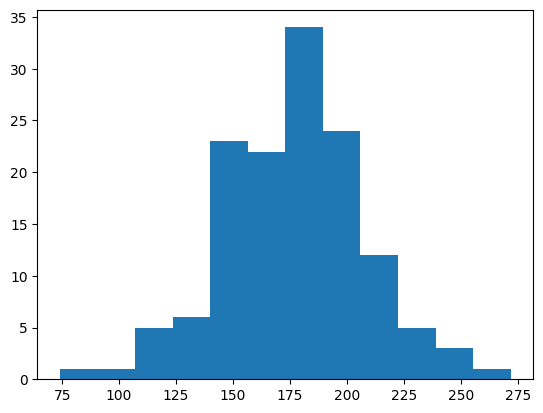

In [104]:
# draw hist
nbars = np.ceil(np.sqrt((len(input_data))))
plt.hist(input_data, int(nbars))
plt.show()

<Axes: xlabel='Fueling time (sec)', ylabel='Density'>

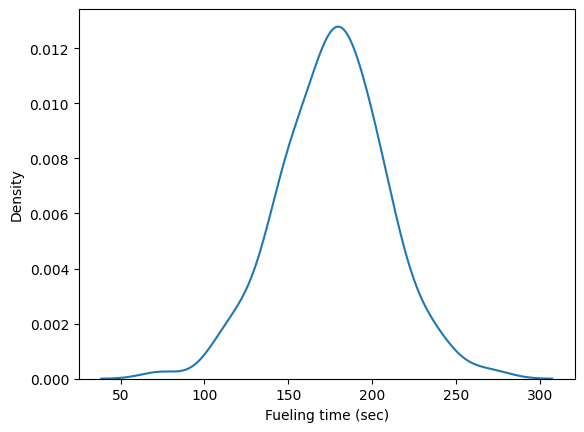

In [105]:
# fit a kernel
import seaborn as sns
sns.kdeplot(input_data)

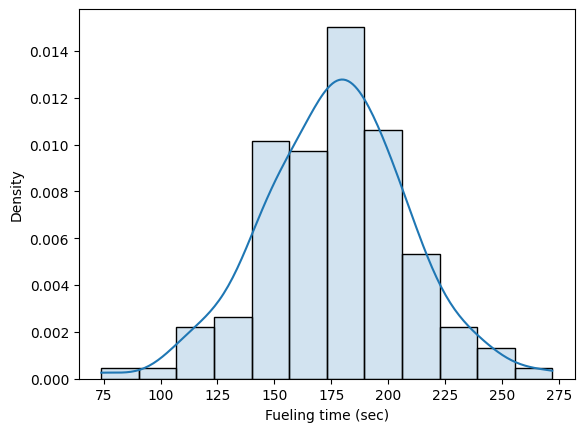

In [106]:
# draw hist and fit a kernel
import seaborn as sns
sns.histplot(input_data,kde=True,stat="density",alpha=0.2)
plt.show()

Get help from ACF and PACF graphs to reveal any **auto-correlation** structure in your data.

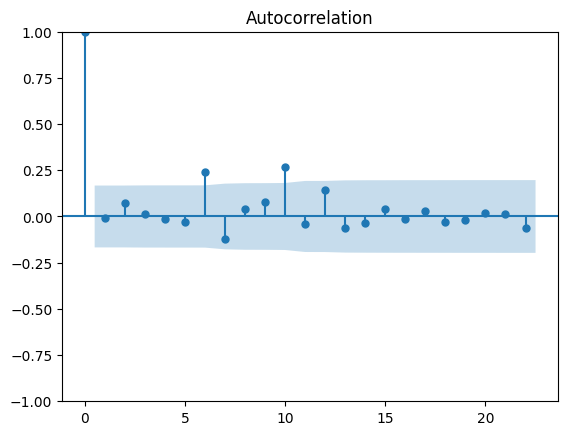

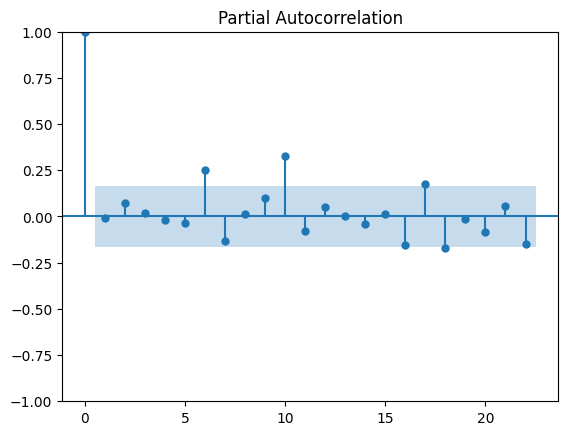

In [107]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(input_data); 
plot_pacf(input_data);

Try Q-Q plots on a number of alternatives to **select a distribution family** (or a number of potential candidates). Always refer to [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) documentation to get to know what input parameters need to provided for each distribution.

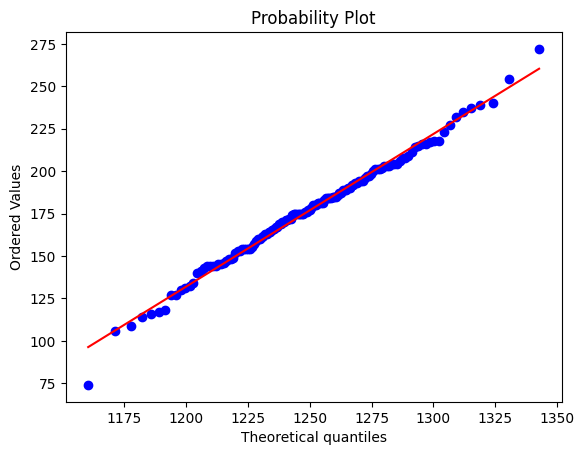

In [119]:
#draw a q-q plot againts various distributions
fig = plt.figure()
ax = fig.add_subplot(111)
# stats.probplot(input_data, dist=stats.norm, plot=ax)
# stats.probplot(input_data, dist=stats.expon, plot=ax)
# stats.probplot(input_data, dist=stats.uniform, plot=ax)
stats.probplot(input_data, dist=stats.gamma, sparams=(1249.7889893297297,), plot=ax)
# stats.probplot(input_data, dist=stats.beta, sparams=(18421.460053343173, 638.3866868837406), plot=ax)
plt.show()

There is in fact an **automated way** of searching for an appropriate distribution and estimating its parameters (see `distfit()` below). The most suitable distribution is selected as Beta distribution.

#### Estimate Parameters and Perform Goodness-of-fit
##### K-S test on interarrival times

In [ ]:
from scipy.stats import kstest
kstest(interarrival_time,'beta',
       [1.0075580035477385,
        50.91118687221094,
        2.395382549338611e-05,
        70.59205633029417])
kstest(interarrival_time,'expon',
       [0.0000,1.369817])

KstestResult(statistic=0.010023150692294924, pvalue=0.2658106043225813)

### Appendix: Distfit library

In [ ]:
%pip install distfit
from distfit import distfit

# Initialize distfit
dist = distfit()

# Determine best-fitting probability distribution for data
dist.fit_transform(input_data)

In [116]:
print(dist.summary)

          name     score           loc         scale  \
0         beta  0.000019 -23220.478813  24207.966725   
1     loggamma  0.000019  -2819.212831    530.627279   
2            t  0.000019    176.719672     31.509924   
3         norm  0.000019    176.620438     31.538907   
4        gamma   0.00002    -939.86689      0.893289   
5     dweibull  0.000022     178.56731     25.983859   
6      uniform  0.000278          74.0         198.0   
7        expon  0.000418          74.0    102.620438   
8       pareto  0.000418 -4294967222.0  4294967296.0   
9   genextreme  0.000586    271.770817      0.504953   
10     lognorm  0.000622          74.0      2.231698   

                                        arg  \
0   (18421.460053343173, 638.3866868837406)   
1                      (283.6092768728765,)   
2                     (1002.0926998558425,)   
3                                        ()   
4                     (1249.7889893297297,)   
5                     (1.2022563859894397,)  

[distfit] >INFO> Ploting Summary.


(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Beta (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

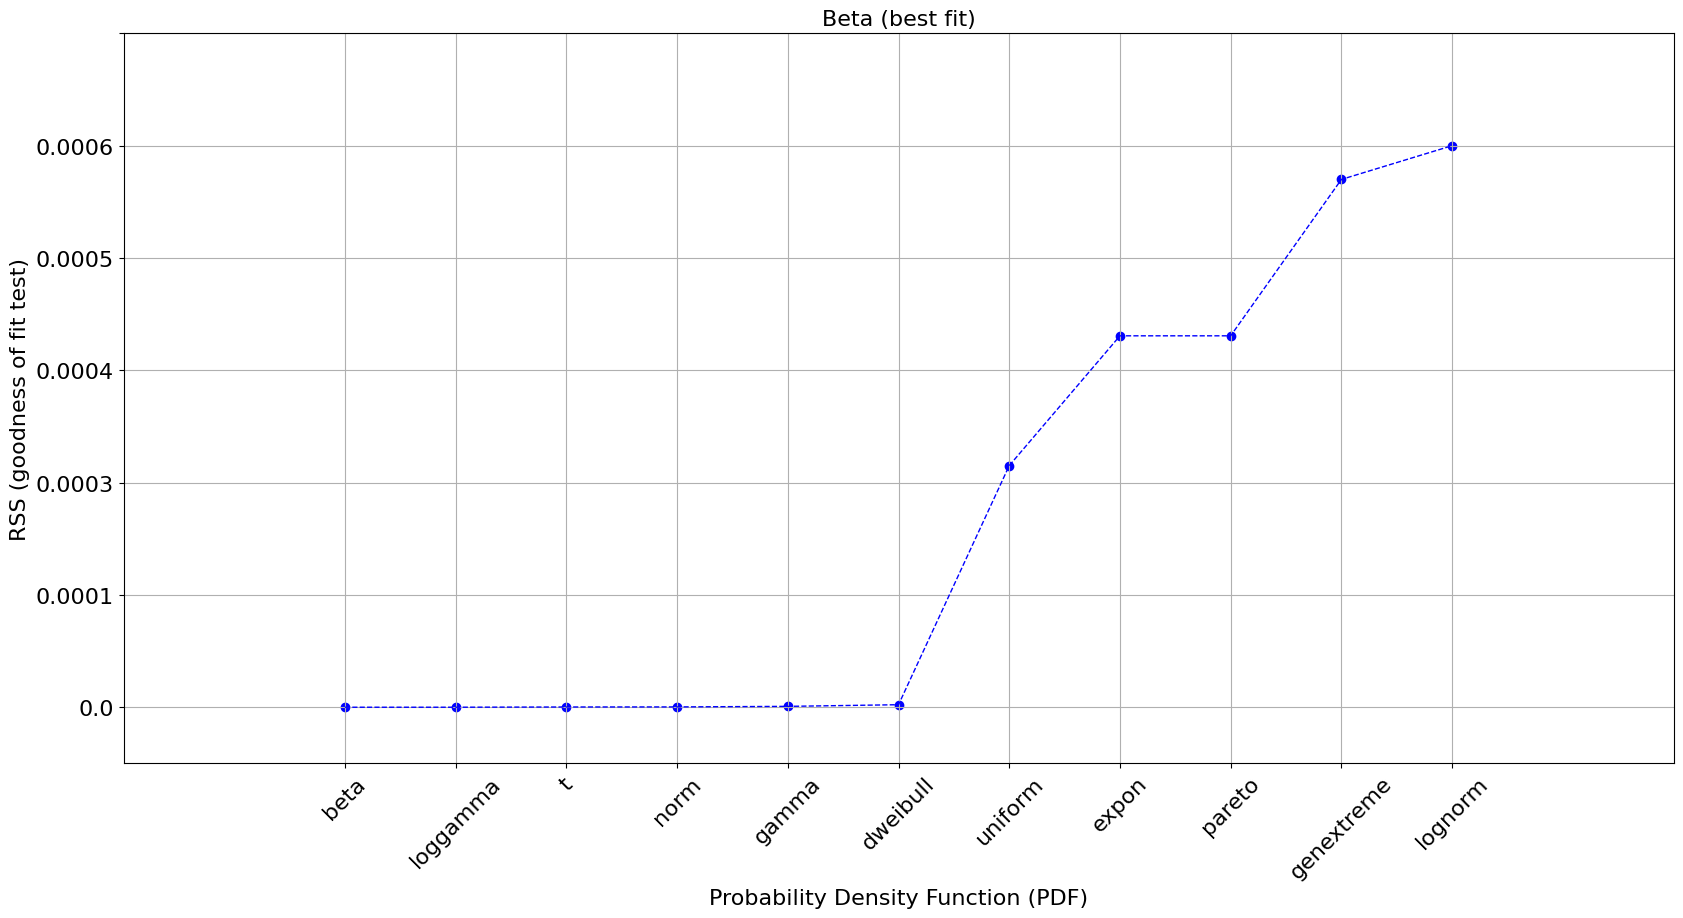

In [117]:
dist.plot_summary()

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Gamma(loc:-0.008803, scale:119.432614)


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\ngamma(a=1.0137, loc=-0.00880334, scale=119.433)'}, xlabel='Values', ylabel='Frequency'>)

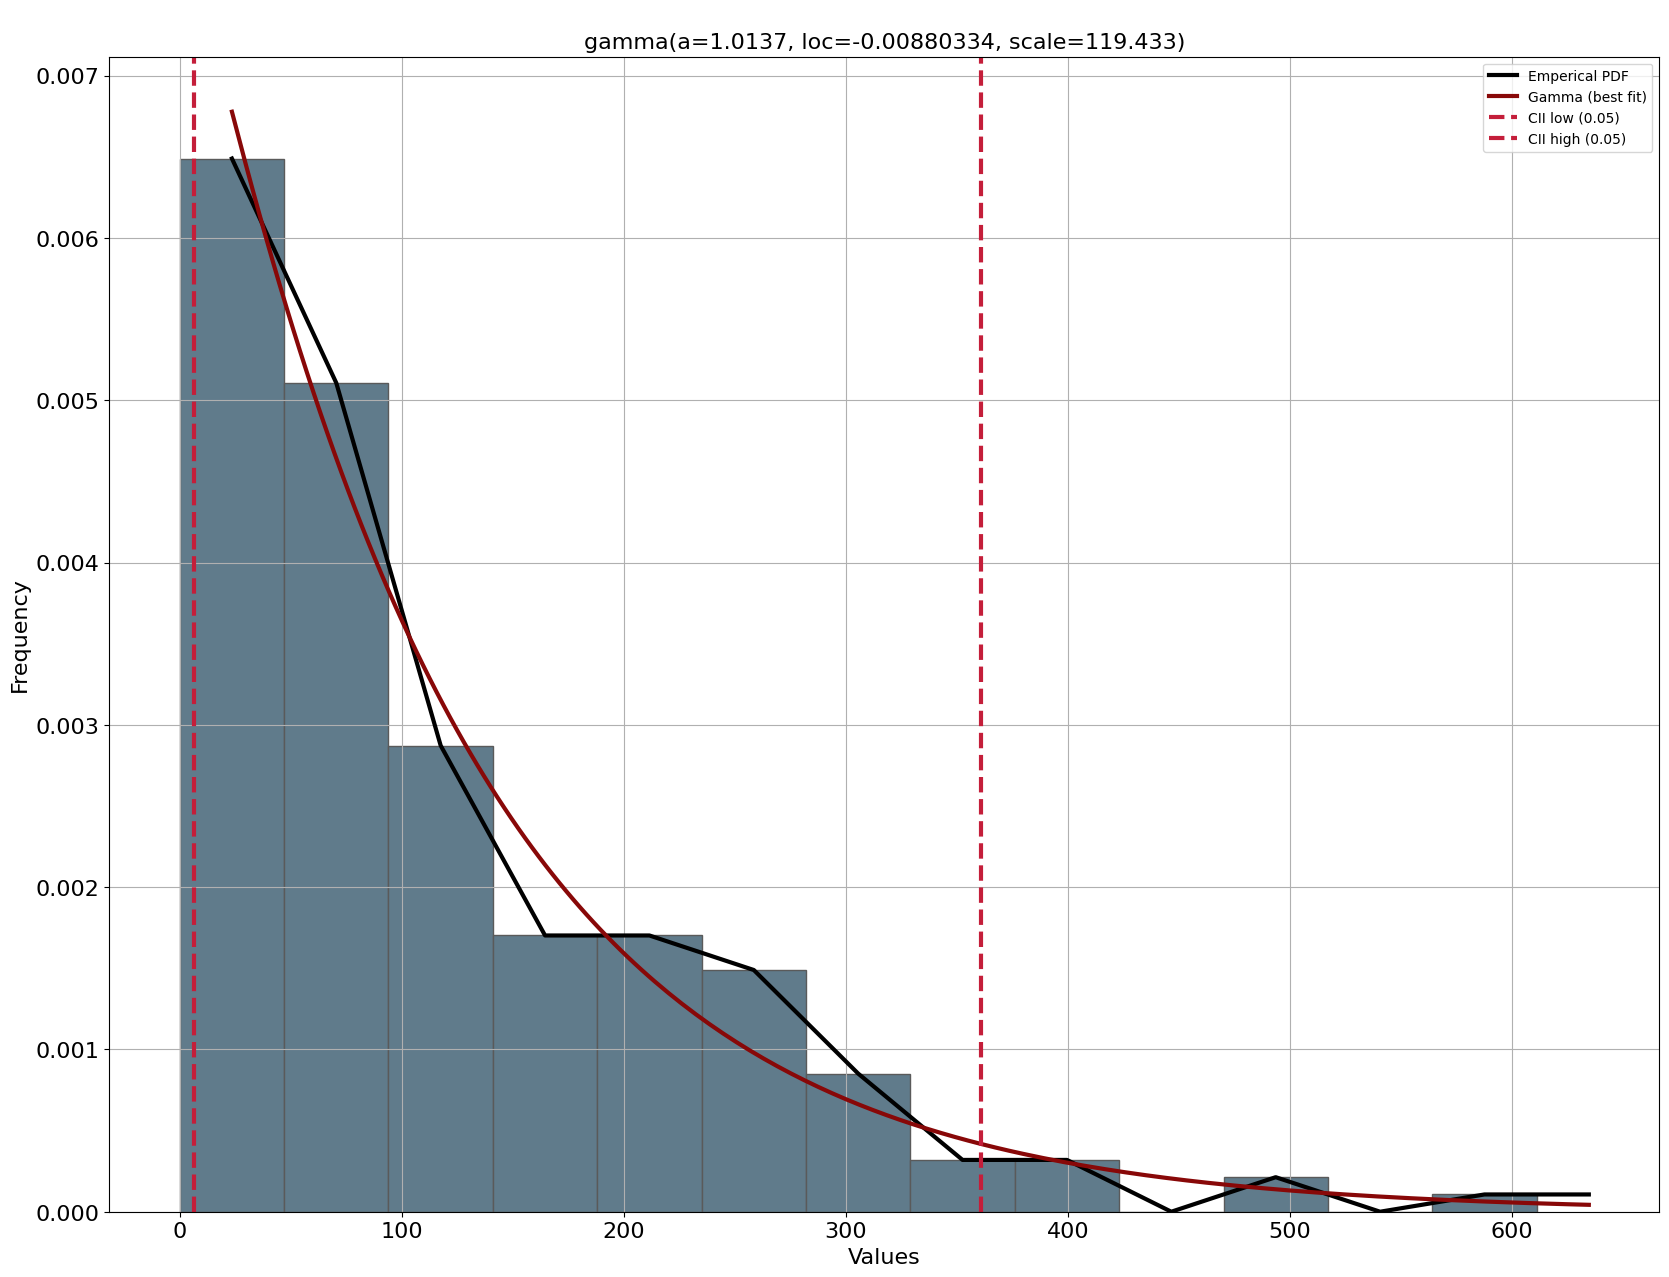

In [101]:
dist.plot()

### Resources
- Case adopted from [https://github.com/ritikbhatia](https://github.com/ritikbhatia).
- Best fit: [https://www.kdnuggets.com/2021/09/determine-best-fitting-data-distribution-python.html](https://www.kdnuggets.com/2021/09/determine-best-fitting-data-distribution-python.html)